In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [3]:
# Step 1: Load Data
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
ma_100_days = data['Close'].rolling(100).mean()
ma_200_days = data['Close'].rolling(200).mean()

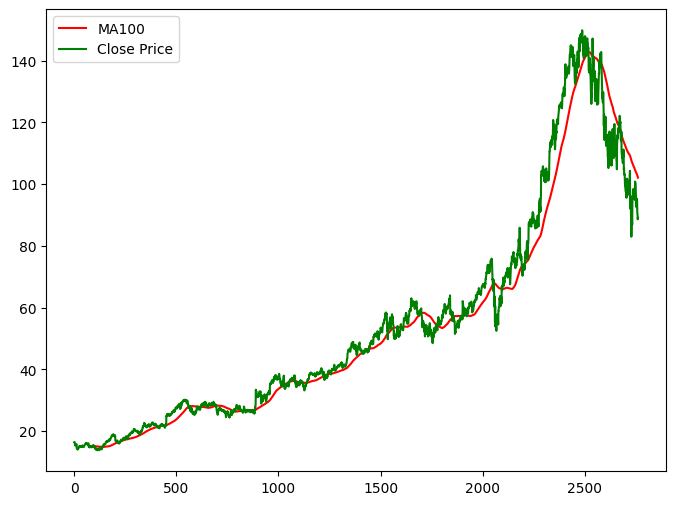

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label='MA100')
plt.plot(data['Close'], 'g', label='Close Price')
plt.legend()
plt.show()

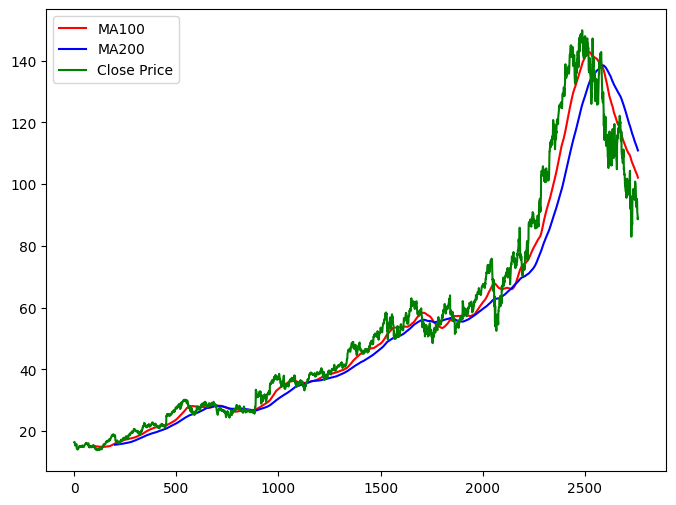

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label='MA100')
plt.plot(ma_200_days, 'b', label='MA200')
plt.plot(data['Close'], 'g', label='Close Price')
plt.legend()
plt.show()

In [8]:
data.dropna(inplace=True)

In [9]:
train_data = pd.DataFrame(data['Close'][0:int(len(data)*0.80)])
test_data = pd.DataFrame(data['Close'][int(len(data)*0.80):])

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)

In [11]:
x_train = []
y_train = []

In [12]:
for i in range(100, len(train_scaled)):
    x_train.append(train_scaled[i-100:i])
    y_train.append(train_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

In [13]:
model = Sequential()
model.add(LSTM(units=80, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.25))

model.add(LSTM(units=100, activation='relu', return_sequences=True))
model.add(Dropout(0.30))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.35))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=60, batch_size=32, verbose=1)

C:\Users\study\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - loss: 0.0606
Epoch 2/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0041
Epoch 3/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - loss: 0.0036
Epoch 4/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - loss: 0.0037
Epoch 5/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0028
Epoch 6/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 0.0029
Epoch 7/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - loss: 0.0026
Epoch 8/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0030
Epoch 9/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0030
Epoch 10/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0024
Epoch 11/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0026
Epoch 12/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0025
Epoch 13/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - loss: 0.0021
Epoch 14/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0021
Epoch 15/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - l

In [14]:
past_100_days = train_data.tail(100)
final_test_data = pd.concat([past_100_days, test_data], ignore_index=True)

In [15]:
test_scaled = scaler.transform(final_test_data)

In [16]:
x_test = []
y_test = []

In [17]:
for i in range(100, len(test_scaled)):
    x_test.append(test_scaled[i-100:i])
    y_test.append(test_scaled[i, 0])

In [18]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
y_pred = model.predict(x_test)

11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step